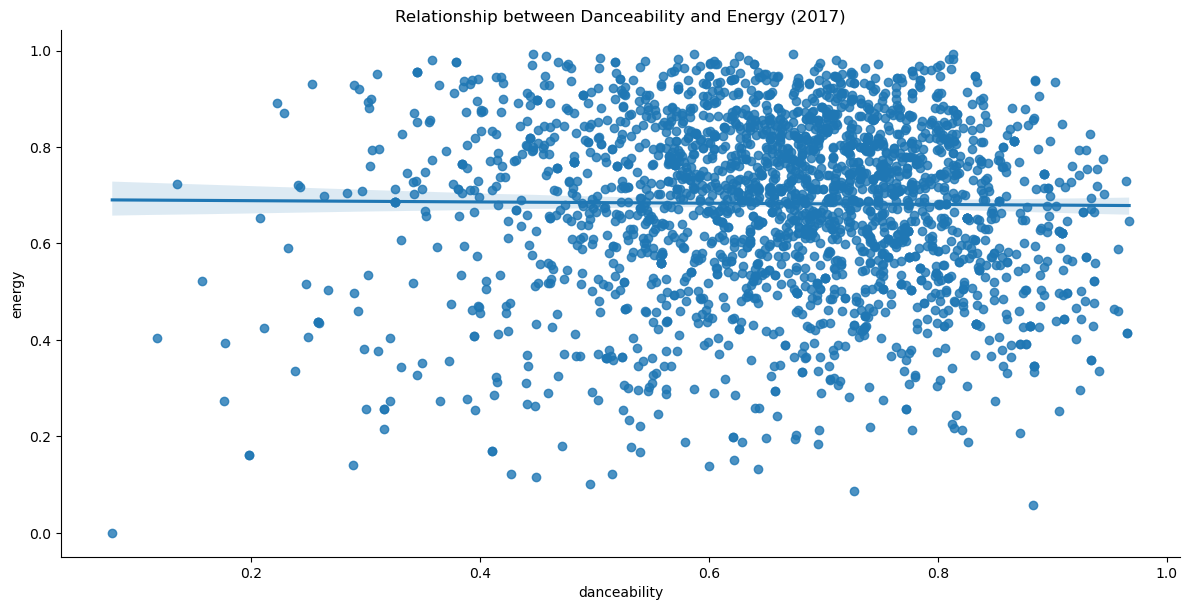

Correlation between danceability and energy:
              danceability    energy
danceability      1.000000 -0.010399
energy           -0.010399  1.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify.csv')

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

df = df.dropna(subset=['track_album_release_date'])

df['release_year'] = df['track_album_release_date'].dt.year

df_2017 = df[df['release_year'] == 2017]

avg_values = df_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000
}).reset_index()

avg_values.to_csv('spotify_avg_values_2017.csv', index=False)

sns.lmplot(x='danceability', y='energy', data=df_2017, aspect=2, height=6)
plt.title('Relationship between Danceability and Energy (2017)')
plt.show()

correlation = df_2017[['danceability', 'energy']].corr()

print("Correlation between danceability and energy:")
print(correlation.to_string(index=True))